<a href="https://colab.research.google.com/github/danielrivaldo27/test/blob/main/Test_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Superstore Kaggle

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [2]:
df = pd.read_csv('Sample - Superstore.csv', encoding='windows-1252')

In [3]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8246,8247,CA-2015-129217,5/10/2015,5/10/2015,Same Day,DP-13390,Dennis Pardue,Home Office,United States,Aurora,...,60505,Central,OFF-AP-10002439,Office Supplies,Appliances,Tripp Lite Isotel 8 Ultra 8 Outlet Metal Surge,70.970,5,0.8,-191.6190
9847,9848,CA-2017-169327,9/2/2017,9/4/2017,Second Class,MH-17290,Marc Harrigan,Home Office,United States,Los Angeles,...,90008,West,FUR-FU-10004188,Furniture,Furnishings,Luxo Professional Combination Clamp-On Lamps,511.500,5,0.0,132.9900
1100,1101,CA-2016-107216,6/14/2016,6/17/2016,First Class,PV-18985,Paul Van Hugh,Home Office,United States,San Francisco,...,94122,West,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,29.290,1,0.0,9.6657
9627,9628,CA-2014-139283,11/23/2014,11/27/2014,Standard Class,BT-11440,Bobby Trafton,Consumer,United States,Detroit,...,48227,Central,OFF-BI-10002049,Office Supplies,Binders,UniKeep View Case Binders,14.670,3,0.0,6.7482
4766,4767,CA-2015-123155,3/9/2015,3/12/2015,First Class,NS-18640,Noel Staavos,Corporate,United States,San Antonio,...,78207,Central,TEC-AC-10002473,Technology,Accessories,Maxell 4.7GB DVD-R,113.520,5,0.2,29.7990
6898,6899,US-2015-165512,5/24/2015,5/26/2015,Second Class,VS-21820,Vivek Sundaresam,Consumer,United States,Naperville,...,60540,Central,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",602.651,7,0.3,-163.5767
6464,6465,US-2016-155404,9/22/2016,9/28/2016,Standard Class,AS-10630,Ann Steele,Home Office,United States,Louisville,...,40214,South,FUR-FU-10004586,Furniture,Furnishings,G.E. Longer-Life Indoor Recessed Floodlight Bulbs,13.280,2,0.0,6.3744
4162,4163,CA-2015-163587,3/14/2015,3/18/2015,Standard Class,EP-13915,Emily Phan,Consumer,United States,Dover,...,3820,East,OFF-LA-10004484,Office Supplies,Labels,Avery 476,16.520,4,0.0,7.5992
4943,4944,CA-2017-106782,12/21/2017,12/27/2017,Standard Class,LP-17095,Liz Preis,Consumer,United States,Lafayette,...,47905,Central,OFF-ST-10004459,Office Supplies,Storage,Tennsco Single-Tier Lockers,375.340,1,0.0,18.7670
361,362,CA-2017-144904,9/25/2017,10/1/2017,Standard Class,KW-16435,Katrina Willman,Consumer,United States,New York City,...,10009,East,OFF-LA-10001158,Office Supplies,Labels,"Avery Address/Shipping Labels for Typewriters,...",20.700,2,0.0,9.9360


In [4]:
df.drop(['Row ID'], axis = 1,  inplace = True)

In [5]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [7]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


##Buat tabel baru

In [10]:
Order = df[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode']]
Order

,Order ID,Order Date,Ship Date,Ship Mode
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class
...,...,...,...,...
9989,CA-2014-110422,1/21/2014,1/23/2014,Second Class
9990,CA-2017-121258,2/26/2017,3/3/2017,Standard Class
9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class
9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class


In [11]:
Product = df[['Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount','Profit']]
Product = df.iloc[:,12:]
Product

,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...
9989,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [12]:
tes = pd.concat([Order, Product])
tes

,Order ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,NaN,NaN,NaN,NaN,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3.0,0.2,4.1028
9990,NaN,NaN,NaN,NaN,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2.0,0.0,15.6332
9991,NaN,NaN,NaN,NaN,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2.0,0.2,19.3932
9992,NaN,NaN,NaN,NaN,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4.0,0.0,13.3200


#Filtering

In [13]:
standard = Order[Order['Ship Mode'] == 'Standard Class']
standard

,Order ID,Order Date,Ship Date,Ship Mode
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class
5,CA-2014-115812,6/9/2014,6/14/2014,Standard Class
6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class
7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class
...,...,...,...,...
9987,CA-2017-163629,11/17/2017,11/21/2017,Standard Class
9988,CA-2017-163629,11/17/2017,11/21/2017,Standard Class
9990,CA-2017-121258,2/26/2017,3/3/2017,Standard Class
9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class


In [14]:
goodproducts = Product[Product['Profit'] > 5000]
goodproducts

,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4190,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.0,5039.9856
6826,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.9760
8153,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.9808


#add new col

#Visualisasi

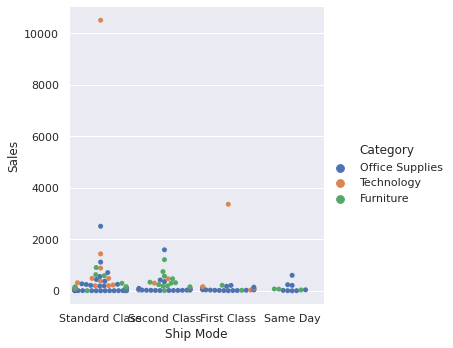

In [15]:
p= sns.catplot(x="Ship Mode", y="Sales", hue="Category", kind="swarm", data=df.sample(200))

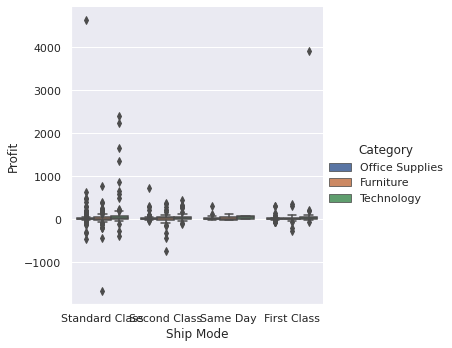

In [16]:
p= sns.catplot(x="Ship Mode", y="Profit", hue="Category", kind="box", data=df.sample(1000))

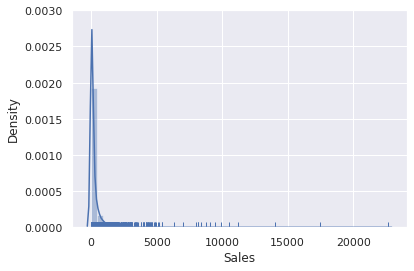

In [17]:
p = sns.distplot(df['Sales'], kde=True, rug=True)

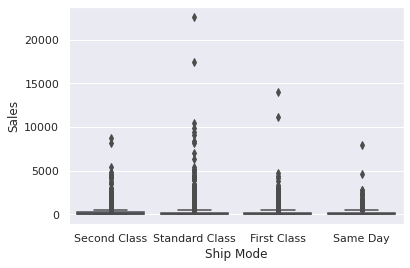

In [18]:
sns.boxplot(x="Ship Mode", y= "Sales", data=df)